In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv('Train_Data_ET.csv')

test=pd.read_csv('Test_Data_ET.csv')

train.shape,test.shape

((97616, 32), (41836, 31))

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le=LabelEncoder()
ms=MinMaxScaler()
from sklearn import metrics

In [57]:
train.head()

,ID,Age,Recently_upskilled,Region,RemoteWork,PercentSalaryIncrement,OfficeHours,StockOptionLevel,College_Tier,YearsSinceLastPromotion,...,Department,EnvironmentSatisfaction1,EnvironmentSatisfaction2,JobSatisfaction1,JobSatisfaction2,JobInvolvement1,JobInvolvement2,PerformanceRating1,PerformanceRating2,Employeeturnover
0,45298,33,0,Chennai,0,15,9,1,Tier-3,1.0,...,Ops,NaN,3.0,4.0,2.0,2.0,2.0,2.0,3.0,0
1,172630,34,1,Delhi NCR,0,16,7,0,Tier-3,NaN,...,Finance,2.0,3.0,2.0,NaN,3.0,NaN,NaN,NaN,1
2,63754,33,1,Chennai,0,14,7,0,Tier-3,1.0,...,Sales,NaN,2.0,3.0,NaN,3.0,NaN,2.0,2.0,0
3,107105,38,0,Delhi NCR,0,10,7,1,Tier-3,NaN,...,Sales,4.0,4.0,2.0,NaN,NaN,2.0,3.0,NaN,0
4,173095,28,1,Hyderabad,0,16,7,0,Tier-3,0.0,...,Sales,1.0,2.0,4.0,NaN,3.0,NaN,3.0,4.0,1


In [58]:
test.head()

,ID,Age,Recently_upskilled,Region,RemoteWork,PercentSalaryIncrement,OfficeHours,StockOptionLevel,College_Tier,YearsSinceLastPromotion,...,TrainingTimesLastYear,Department,EnvironmentSatisfaction1,EnvironmentSatisfaction2,JobSatisfaction1,JobSatisfaction2,JobInvolvement1,JobInvolvement2,PerformanceRating1,PerformanceRating2
0,142055,43,0,Bangalore,0,13,8,1,NaN,2.0,...,3,HR,4.0,2.0,4.0,4.0,NaN,3.0,4.0,4.0
1,44367,35,0,Hyderabad,0,26,8,2,Tier-1,2.0,...,3,Sales,4.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0
2,124144,29,0,Bangalore,0,23,7,2,Tier-3,0.0,...,2,Sales,4.0,NaN,4.0,3.0,3.0,2.0,4.0,3.0
3,110431,37,0,Bangalore,0,12,8,1,Tier-2,NaN,...,0,HR,4.0,3.0,NaN,NaN,4.0,3.0,4.0,3.0
4,174576,23,0,Delhi NCR,0,23,8,1,Tier-3,1.0,...,2,Sales,4.0,4.0,4.0,2.0,4.0,2.0,3.0,3.0


In [59]:
train.isna().sum()

ID                              0
Age                             0
Recently_upskilled              0
Region                          0
RemoteWork                      0
PercentSalaryIncrement          0
OfficeHours                     0
StockOptionLevel                0
College_Tier                 2906
YearsSinceLastPromotion     16387
HighestEducation                0
BusinessTravel                  0
JobLevel                        0
MaritalStatus                   0
TotalWorkExp                    0
MonthlySalary                   0
yof joining                     0
YearsWithCurrManager            0
DistanceFromHome                0
NumCompaniesWorked           2872
Gender                          0
TrainingTimesLastYear           0
Department                      0
EnvironmentSatisfaction1     7086
EnvironmentSatisfaction2     8507
JobSatisfaction1             7086
JobSatisfaction2             8569
JobInvolvement1              7111
JobInvolvement2              8546
PerformanceRat

In [60]:
test.isna().sum()

ID                             0
Age                            0
Recently_upskilled             0
Region                         0
RemoteWork                     0
PercentSalaryIncrement         0
OfficeHours                    0
StockOptionLevel               0
College_Tier                1297
YearsSinceLastPromotion     7009
HighestEducation               0
BusinessTravel                 0
JobLevel                       0
MaritalStatus                  0
TotalWorkExp                   0
MonthlySalary                  0
yof joining                    0
YearsWithCurrManager           0
DistanceFromHome               0
NumCompaniesWorked          1363
Gender                         0
TrainingTimesLastYear          0
Department                     0
EnvironmentSatisfaction1    2242
EnvironmentSatisfaction2    6129
JobSatisfaction1            2228
JobSatisfaction2            6162
JobInvolvement1             2250
JobInvolvement2             6166
PerformanceRating1          2196
Performanc

In [61]:
data=pd.concat([train.drop(['Employeeturnover'],axis=1),test],axis=0).reset_index(drop=True)
data.shape

(139452, 31)

In [62]:
data.isna().sum()

ID                              0
Age                             0
Recently_upskilled              0
Region                          0
RemoteWork                      0
PercentSalaryIncrement          0
OfficeHours                     0
StockOptionLevel                0
College_Tier                 4203
YearsSinceLastPromotion     23396
HighestEducation                0
BusinessTravel                  0
JobLevel                        0
MaritalStatus                   0
TotalWorkExp                    0
MonthlySalary                   0
yof joining                     0
YearsWithCurrManager            0
DistanceFromHome                0
NumCompaniesWorked           4235
Gender                          0
TrainingTimesLastYear           0
Department                      0
EnvironmentSatisfaction1     9328
EnvironmentSatisfaction2    14636
JobSatisfaction1             9314
JobSatisfaction2            14731
JobInvolvement1              9361
JobInvolvement2             14712
PerformanceRat

In [63]:
for i in data[['College_Tier', 'YearsSinceLastPromotion','NumCompaniesWorked','EnvironmentSatisfaction1','EnvironmentSatisfaction2', 'JobSatisfaction1', 
                'JobSatisfaction2','JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1','PerformanceRating2']]:
    print('\n\n-----------------------',i,'--------------------------------')
    print(data[i].value_counts()/data.shape[0]*100)




----------------------- College_Tier --------------------------------
Tier-3    66.501018
Tier-2    17.023779
Tier-1    13.461263
Name: College_Tier, dtype: float64


----------------------- YearsSinceLastPromotion --------------------------------
0.0    34.222528
1.0    26.512348
2.0     8.403608
3.0     3.807045
4.0     3.605542
7.0     2.540659
6.0     1.784844
5.0     1.715286
8.0     0.631042
Name: YearsSinceLastPromotion, dtype: float64


----------------------- NumCompaniesWorked --------------------------------
1.0     48.099705
2.0     12.866076
3.0      8.662479
4.0      6.956516
5.0      6.045808
6.0      4.232998
7.0      3.751829
8.0      3.394716
9.0      1.891690
10.0     1.061297
Name: NumCompaniesWorked, dtype: float64


----------------------- EnvironmentSatisfaction1 --------------------------------
3.0    29.176347
4.0    29.038666
2.0    26.472908
1.0     8.623039
Name: EnvironmentSatisfaction1, dtype: float64


----------------------- EnvironmentSatisfaction2 --

In [64]:
for i in data[['College_Tier', 'YearsSinceLastPromotion','NumCompaniesWorked','EnvironmentSatisfaction1',
                'EnvironmentSatisfaction2', 'JobSatisfaction1','JobSatisfaction2','JobInvolvement1', 'JobInvolvement2', 
                'PerformanceRating1','PerformanceRating2']]:
    data[i]=data[i].fillna(data[i].mode()[0])

In [65]:
data.isna().sum()

ID                          0
Age                         0
Recently_upskilled          0
Region                      0
RemoteWork                  0
PercentSalaryIncrement      0
OfficeHours                 0
StockOptionLevel            0
College_Tier                0
YearsSinceLastPromotion     0
HighestEducation            0
BusinessTravel              0
JobLevel                    0
MaritalStatus               0
TotalWorkExp                0
MonthlySalary               0
yof joining                 0
YearsWithCurrManager        0
DistanceFromHome            0
NumCompaniesWorked          0
Gender                      0
TrainingTimesLastYear       0
Department                  0
EnvironmentSatisfaction1    0
EnvironmentSatisfaction2    0
JobSatisfaction1            0
JobSatisfaction2            0
JobInvolvement1             0
JobInvolvement2             0
PerformanceRating1          0
PerformanceRating2          0
dtype: int64

In [66]:
data['yof joining']=2021-data['yof joining']

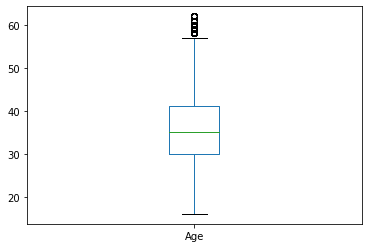

In [68]:
data['Age'].plot(kind='box')

In [69]:
data['Age'].skew(),np.log(data['Age']).skew(),np.cbrt(data['Age']).skew()

(0.4369710510382229, -0.16383965892830263, 0.04611620165686106)

In [70]:
data['PercentSalaryIncrement'].value_counts()

13    19322
14    17691
12    16666
15    15264
16    12025
11    10286
17     9638
18     8635
19     7213
20     5481
21     4343
10     4088
22     3739
23     2497
24     1382
25      799
26      337
27       46
Name: PercentSalaryIncrement, dtype: int64

In [71]:
data['YearsWithCurrManager'].value_counts()

0     31323
1     23637
2     19171
3     13321
6     11193
7      9761
4      9167
8      6698
5      5856
9      3610
10     1797
11     1301
12      984
13      565
15      358
14      335
17      186
16      153
18       36
Name: YearsWithCurrManager, dtype: int64

In [72]:
data['MonthlySalary'].skew(),np.log(data['MonthlySalary']).skew(),np.cbrt(data['MonthlySalary']).skew()

(1.397656935390218, 0.2906969058846043, 0.6901120767280163)

In [73]:
data['MonthlySalary']=np.log(data['MonthlySalary'])

In [74]:
data['yof joining'].value_counts()

7     14258
5     14230
8     12890
6     12823
4     12395
9     11142
11    10080
12     8916
10     8345
3      7381
13     5381
14     3727
15     2076
17     1798
16     1644
23     1558
18     1383
24     1310
21     1122
19     1033
22      950
20      822
25      794
27      571
26      367
34      363
33      317
35      269
36      264
28      201
29      191
40      162
30      157
38      129
41       80
31       63
39       63
44       55
37       51
45       40
32       22
42       21
43        8
Name: yof joining, dtype: int64

In [75]:
data['yof joining'].skew(),np.log(data['yof joining']).skew(),np.cbrt(data['yof joining']).skew()

(2.0092236811150084, 0.2675441086884925, 0.7828637715849969)

In [76]:
data['yof joining']=np.log(data['yof joining'])

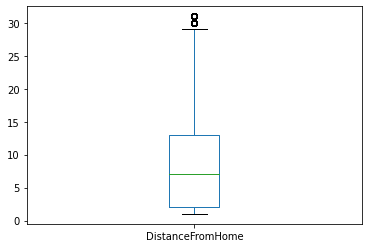

In [53]:
data['DistanceFromHome'].plot(kind='box')

In [23]:
data['DistanceFromHome'].skew(),np.log(data['DistanceFromHome']).skew(),np.cbrt(data['DistanceFromHome']).skew()

(0.9989211990316168, -0.28626230162214356, 0.17107830330611942)

In [77]:
 data[['Recently_upskilled', 'Region', 'RemoteWork', 'PercentSalaryIncrement',
       'OfficeHours', 'StockOptionLevel', 'College_Tier',
       'YearsSinceLastPromotion', 'HighestEducation', 'BusinessTravel',
       'JobLevel', 'MaritalStatus', 'TotalWorkExp', 'YearsWithCurrManager',
       'NumCompaniesWorked', 'Gender', 'TrainingTimesLastYear', 'Department',
       'EnvironmentSatisfaction1', 'EnvironmentSatisfaction2',
       'JobSatisfaction1', 'JobSatisfaction2', 'JobInvolvement1',
       'JobInvolvement2', 'PerformanceRating1', 'PerformanceRating2']]= data[['Recently_upskilled', 
                                                                              'Region', 'RemoteWork', 
                                                                              'PercentSalaryIncrement',
       'OfficeHours', 'StockOptionLevel', 'College_Tier',
       'YearsSinceLastPromotion', 'HighestEducation', 'BusinessTravel',
       'JobLevel', 'MaritalStatus', 'TotalWorkExp', 'YearsWithCurrManager',
       'NumCompaniesWorked', 'Gender', 'TrainingTimesLastYear', 'Department',
       'EnvironmentSatisfaction1', 'EnvironmentSatisfaction2',
       'JobSatisfaction1', 'JobSatisfaction2', 'JobInvolvement1',
       'JobInvolvement2', 'PerformanceRating1', 'PerformanceRating2']].astype('object')

In [78]:
cat=data.drop(['ID','Age',
               'MonthlySalary','DistanceFromHome','yof joining'],axis=1)
cat_d=pd.get_dummies(cat,drop_first=True)

In [79]:
num=data[['Age','MonthlySalary','DistanceFromHome','yof joining']]
num_sc=pd.DataFrame(ms.fit_transform(num),columns=num.columns)

In [80]:
new=pd.concat([cat_d,num_sc],axis=1)
new['ID']=data['ID']
new.shape,cat.shape,cat_d.shape,num.shape,num_sc.shape

((139452, 159), (139452, 26), (139452, 154), (139452, 4), (139452, 4))

In [81]:
train.shape

(97616, 32)

In [82]:
new_train=new.iloc[:97616]
new_test=new[97616:]

In [107]:
y=train['Employeeturnover']
X=new_train.drop('ID',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234,stratify=y)

In [108]:
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)

pred_test=DT.predict(X_test)
print(metrics.classification_report(y_test,pred_test))

metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     23490
           1       0.70      0.72      0.71      5795

    accuracy                           0.88     29285
   macro avg       0.82      0.82      0.82     29285
weighted avg       0.89      0.88      0.89     29285



array([[21729,  1761],
       [ 1616,  4179]], dtype=int64)

In [109]:
cvs=cross_val_score(estimator=DT,X=X_train,y=y_train,cv=5,error_score='raise')
cvs

array([0.87649082, 0.88116493, 0.87743305, 0.88006732, 0.8792624 ])

In [110]:
from xgboost import XGBClassifier

In [120]:
XGB=XGBClassifier(use_label_encoder=False,learning_rate=.8,gamma=3)
XGB.fit(X_train,y_train)

pred_test=XGB.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

[23:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     23490
           1       0.82      0.80      0.81      5795

    accuracy                           0.93     29285
   macro avg       0.88      0.88      0.88     29285
weighted avg       0.92      0.93      0.92     29285



array([[22469,  1021],
       [ 1174,  4621]], dtype=int64)

In [121]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier

In [123]:
RF=RandomForestClassifier(n_estimators=300,criterion='entropy')
RF.fit(X_train,y_train)

pred_test=RF.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     23490
           1       0.89      0.57      0.70      5795

    accuracy                           0.90     29285
   macro avg       0.90      0.78      0.82     29285
weighted avg       0.90      0.90      0.89     29285



array([[23099,   391],
       [ 2469,  3326]], dtype=int64)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred_test=knn.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7830
           1       0.72      0.69      0.70      1932

    accuracy                           0.89      9762
   macro avg       0.82      0.81      0.82      9762
weighted avg       0.88      0.89      0.88      9762



array([[7311,  519],
       [ 601, 1331]], dtype=int64)

In [ ]:
from sklearn.ensemble import Random

# ------------------------------------------------------------------------------------------

In [102]:
s_X=new_test.drop('ID',axis=1)

sub=new_test[['ID']].copy(deep=True)
sub['Employeeturnover']=XGB.predict(s_X)

In [104]:
sub.set_index('ID').to_csv('Submissionfile.csv')

In [103]:
sub['Employeeturnover'].value_counts()#XGB

0    33895
1     7941
Name: Employeeturnover, dtype: int64

In [42]:
sub['Employeeturnover'].value_counts()#DT

0    34003
1     7833
Name: Employeeturnover, dtype: int64